## <strong> 14. 결측 데이터 처리

In [3]:
# 필요한 라이브러리
import pandas as pd
import numpy as np

#### <strong> 결측치의 표현: None 객체

In [2]:
# None 객체를 포함한 배열
arr1 = np.array([1, 2, None, 4])
print(arr1.dtype) 
#object = 여러 타입이 섞여있을경우 
# 결측치가 없는 배열
arr2 = np.array([1, 2, 3, 4])
print(arr2.dtype)

object
int32


In [3]:
# Object 객체는 numpy, pandas 연산과 호환되지 않음
arr1.sum()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

#### <strong> 결측치의 표현: NaN 값

In [4]:
# NaN 값을 포함한 배열 객체
arr3 = np.array([1, np.nan, 3, 4])
arr3.dtype
#np.nan은 실수로 취급

dtype('float64')

In [5]:
# NaN 값에 대한 산술 연산
print(1 + np.nan)
print(0 * np.nan)
print(arr3.sum())

nan
nan
nan


In [6]:
# NaN값을 무시하는 집계함수(numpy)
print(np.nansum(arr3))
print(np.nanmax(arr3))
print(np.nanmin(arr3))

8.0
4.0
1.0


In [7]:
# Pandas는 None 객체를 자동으로 NaN값으로 변환한다.

ser = pd.Series([1, np.nan, 2, None])
print(ser)

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64


### <strong> Pandas를 이용한 결측치 처리
---

#### <strong>마스킹을 통한 Null 값 표현
+ ```isnull()```
+ ```notnull()```

In [8]:
# [+] 결측치를 포함한 Series 객체 생성
ser = pd.Series([1, np.nan, 2, None])
ser

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [9]:
# [+] isnull()
ser.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [10]:
# [+] notnull()
ser.notnull()

0     True
1    False
2     True
3    False
dtype: bool

#### <strong> 결측치를 포함한 행 또는 열 삭제
+ dropna()

In [11]:
# DataFrame 생성 함수
def make_df(cols, ind):
    data = {c: [str(c) + str(i) for i in ind]
           for c in cols}

    return pd.DataFrame(data, ind)

df = make_df('ABC', [0, 1, 2])
df

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [12]:
# [+] NaN 값 추가
df.iloc[0, 1] = np.nan
df.iloc[2, 0] = np.nan
df

,A,B,C
0,A0,NaN,C0
1,A1,B1,C1
2,NaN,B2,C2


In [13]:
# [+] 결측치를 포함한 행 삭제
df.dropna(axis=0)

,A,B,C
1,A1,B1,C1


In [15]:
# [+] 결측치를 포함한 열 삭제
#inplace 사용시 원본값 바뀜(그냥 dropna 사용 시 원본값은 그대로)
df.dropna(axis=1)

,C
0,C0
1,C1
2,C2


In [17]:
# [+] NaN 값 추가
df.iloc[:,2]=np.nan
df

,A,B,C
0,A0,NaN,NaN
1,A1,B1,NaN
2,NaN,B2,NaN


In [22]:
# [+] NaN값이 한 개라도 포함되면 행 또는 열 삭제
df.dropna(axis=0, how='any')#행

,A,B,C


In [23]:
# [+] 모든 값이 전부 NaN값인 행 또는 열 삭제
df.dropna(axis=1, how='all')

,A,B
0,A0,NaN
1,A1,B1
2,NaN,B2


In [24]:
# [+] Non-null(정상으로 측정된) 값의 개수가 임계치보다 작은 행을 삭제
df.dropna(axis=0, thresh = 2)

,A,B,C
1,A1,B1,NaN


In [25]:
# [+] Non-null 값의 개수가 임계치보다 작은 열을 삭제
df.dropna(axis=1, thresh = 2)

,A,B
0,A0,NaN
1,A1,B1
2,NaN,B2


#### <strong> NaN값을 다른 값을 대체
+ ```fillna()```

In [26]:
# Series 객체 생성
ser = pd.Series([1, np.nan, 2, None, 3],
                index=list('abcde'))
ser

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [29]:
# [+] 결측치를 특정 값을 대체
ser.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [30]:
# [+] Forward-fill 방식(= LOCF)시계열일 경우만 사용
ser.fillna(method = 'ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [31]:
# [+] Backward-fill 방식(= NOCB)
ser.fillna(method = 'bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

### <strong> 결측치 처리 예제: Air Quality 데이터셋

In [4]:
from datetime import datetime
from matplotlib import pyplot as plt

"""
Load AirQualityUCI Data
"""

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

input_file = './data/AirQualityUCI_refined.csv'

df = pd.read_csv(input_file,
                 index_col=[0],
                 parse_dates=[0],
                 date_parser=parser)

<ipython-input-4-6f8149b66cdb>:13: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(input_file,


In [5]:
# 데이터 요약
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         7765 non-null   float64
 1   PT08.S1(CO)    8991 non-null   float64
 2   PT08.S2(NMHC)  8991 non-null   float64
 3   NOx(GT)        7718 non-null   float64
 4   PT08.S3(NOx)   8991 non-null   float64
 5   NO2(GT)        7715 non-null   float64
 6   PT08.S4(NO2)   8991 non-null   float64
 7   PT08.S5(O3)    8991 non-null   float64
 8   RH             8991 non-null   float64
 9   AH             8991 non-null   float64
 10  C6H6(GT)       9357 non-null   float64
dtypes: float64(11)
memory usage: 877.2 KB


In [36]:
# 시각화 설정 옵션
%matplotlib qt5
%config InlineBackend.figure_format = 'svg'

plt.rcParams['figure.figsize'] = [12, 5]
plt.rcParams['font.size'] = 13
plt.ion()

In [6]:
!pip install missingno

<AxesSubplot:>

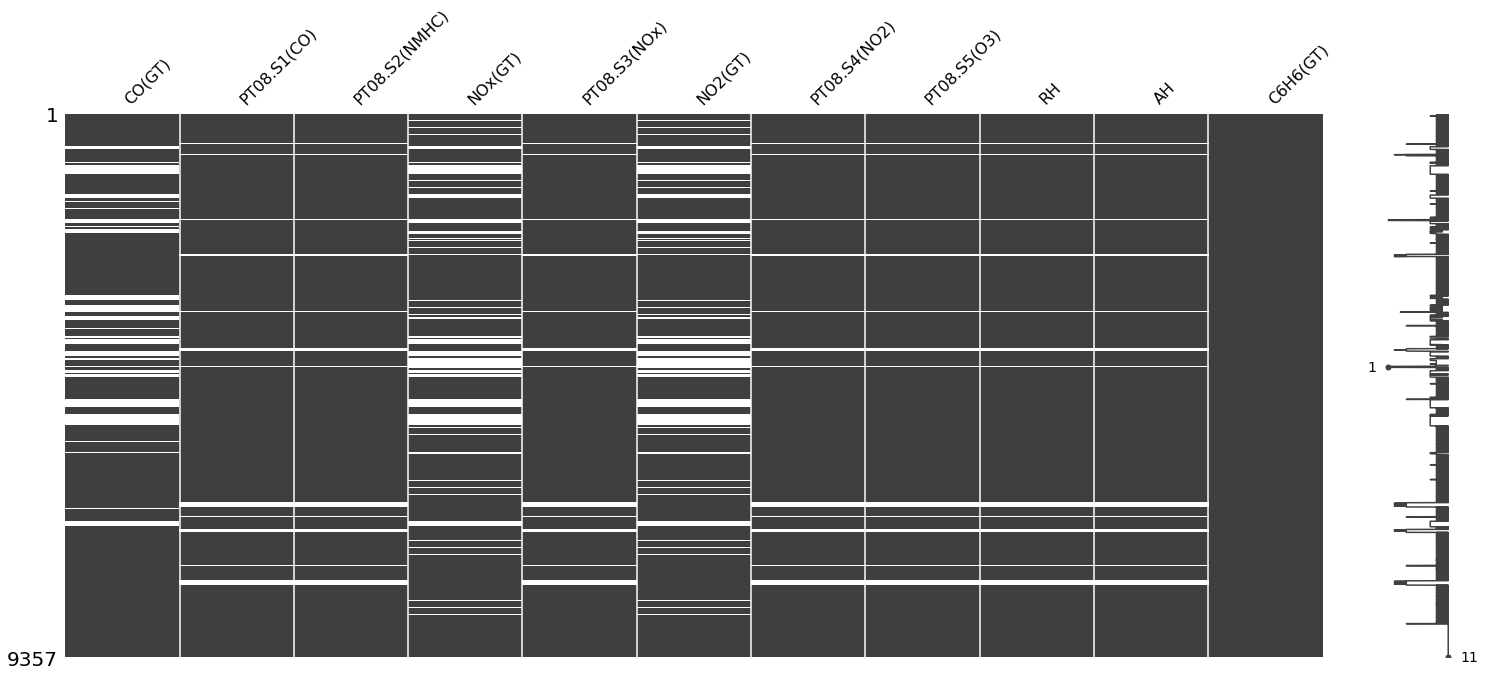

In [7]:
# 결측 데이터 시각화
import missingno

missingno.matrix(df)

<AxesSubplot:xlabel='Datetime'>

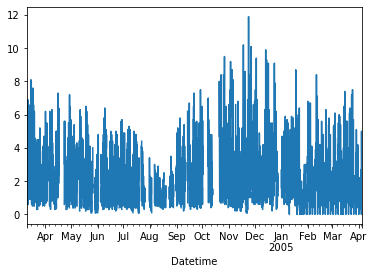

In [8]:
# 일산화탄소(CO) 시계열 시각화
df['CO(GT)'].plot()

In [9]:
# 결측치 대치
imp_locf = df['CO(GT)'].copy().ffill() # LOCF
imp_nocb = df['CO(GT)'].copy().bfill() # NOCB
imp_linear = df['CO(GT)'].copy().interpolate() # 선형 보간
imp_mean = df['CO(GT)'].copy().fillna(df['CO(GT)'].mean())  # 평균값 대체

In [10]:
# K-NN 대치
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)    # default: 2
imp_knn = df.copy().values
imp_knn = imputer.fit_transform(imp_knn)

In [11]:
# K-NN 대치 결과 변환(ndarray -> DataFrame)
imp_df = pd.DataFrame(imp_knn, index=imp_locf.index, columns=df.columns)

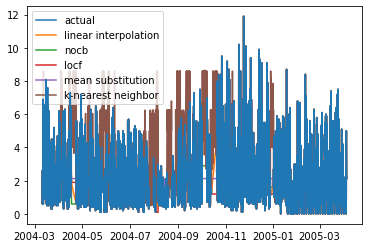

In [12]:
# 결측치 처리 결과 시각화
plt.plot(df['CO(GT)'], label='actual', zorder=10)
plt.plot(imp_linear, label='linear interpolation', zorder=3)
plt.plot(imp_nocb, label='nocb', zorder=2)
plt.plot(imp_locf, label='locf', zorder=1)
plt.plot(imp_mean, label='mean substitution', zorder=4)
plt.plot(imp_df['CO(GT)'], label='k-nearest neighbor', zorder=5)
plt.legend(loc='best')
plt.show()